In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

DF = pd.read_csv('/content/drive/MyDrive/COM480/global_power_plant_database.csv')
DF.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,NaN,NaN,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,...,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,...,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,NaN,NaN,...,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,NaN,NaN,...,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


In [ ]:
# Drop irrelevant columns if needed (adjust as necessary)
columns_to_drop = ['other_fuel1', 'other_fuel2', 'other_fuel3', 'url',
                   'gppd_idnr', 'wepp_id', ]
DF = DF.drop(columns=[col for col in columns_to_drop if col in DF.columns])

In [ ]:
DF.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh_2013', 'estimated_generation_gwh_2014',
       'estimated_generation_gwh_2015', 'estimated_generation_gwh_2016',
       'estimated_generation_gwh_2017', 'estimated_generation_note_2013',
       'estimated_generation_note_2014', 'estimated_generation_note_2015',
       'estimated_generation_note_2016', 'estimated_generation_note_2017'],
      dtype='object')

### Basic Info


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display basic information
print("Dataset Overview:")
print(DF.info())
print(DF.head())

# Check for missing values
print("Missing Values:")
print(DF.isnull().sum())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34936 entries, 0 to 34935
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         34936 non-null  object 
 1   country_long                    34936 non-null  object 
 2   name                            34936 non-null  object 
 3   gppd_idnr                       34936 non-null  object 
 4   capacity_mw                     34936 non-null  float64
 5   latitude                        34936 non-null  float64
 6   longitude                       34936 non-null  float64
 7   primary_fuel                    34936 non-null  object 
 8   other_fuel1                     1944 non-null   object 
 9   other_fuel2                     276 non-null    object 
 10  other_fuel3                     92 non-null     object 
 11  commissioning_year              17447 non-null  float64
 12  owner         

In [ ]:
# Define continent mapping based on country
continent_map = {
    "Africa": ["Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi", "Cameroon", "Cape Verde", "Central African Republic", "Chad", "Comoros", "Democratic Republic of the Congo", "Djibouti", "Egypt", "Equatorial Guinea", "Eritrea", "Eswatini", "Ethiopia", "Gabon", "Gambia", "Ghana", "Guinea", "Guinea-Bissau", "Ivory Coast", "Kenya", "Lesotho", "Liberia", "Libya", "Madagascar", "Malawi", "Mali", "Mauritania", "Mauritius", "Morocco", "Mozambique", "Namibia", "Niger", "Nigeria", "Rwanda", "Sao Tome and Principe", "Senegal", "Seychelles", "Sierra Leone", "Somalia", "South Africa", "South Sudan", "Sudan", "Tanzania", "Togo", "Tunisia", "Uganda", "Zambia", "Zimbabwe"],
    "Asia": ["Afghanistan", "Armenia", "Azerbaijan", "Bahrain", "Bangladesh", "Bhutan", "Brunei", "Cambodia", "China", "Georgia", "India", "Indonesia", "Iran", "Iraq", "Israel", "Japan", "Jordan", "Kazakhstan", "Kuwait", "Kyrgyzstan", "Laos", "Lebanon", "Malaysia", "Maldives", "Mongolia", "Myanmar", "Nepal", "North Korea", "Oman", "Pakistan", "Palestine", "Philippines", "Qatar", "Saudi Arabia", "Singapore", "South Korea", "Sri Lanka", "Syria", "Taiwan", "Tajikistan", "Thailand", "Timor-Leste", "Turkey", "Turkmenistan", "United Arab Emirates", "Uzbekistan", "Vietnam", "Yemen"],
    "Europe": ["Albania", "Andorra", "Austria", "Belarus", "Belgium", "Bosnia and Herzegovina", "Bulgaria", "Croatia", "Cyprus", "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary", "Iceland", "Ireland", "Italy", "Latvia", "Liechtenstein", "Lithuania", "Luxembourg", "Malta", "Moldova", "Monaco", "Montenegro", "Netherlands", "North Macedonia", "Norway", "Poland", "Portugal", "Romania", "Russia", "San Marino", "Serbia", "Slovakia", "Slovenia", "Spain", "Sweden", "Switzerland", "Ukraine", "United Kingdom", "Vatican City"],
    "North America": ["Antigua and Barbuda", "Bahamas", "Barbados", "Belize", "Canada", "Costa Rica", "Cuba", "Dominica", "Dominican Republic", "El Salvador", "Grenada", "Guatemala", "Haiti", "Honduras", "Jamaica", "Mexico", "Nicaragua", "Panama", "Saint Kitts and Nevis", "Saint Lucia", "Saint Vincent and the Grenadines", "Trinidad and Tobago", "United States"],
    "South America": ["Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Ecuador", "Guyana", "Paraguay", "Peru", "Suriname", "Uruguay", "Venezuela"],
    "Oceania": ["Australia", "Fiji", "Kiribati", "Marshall Islands", "Micronesia", "Nauru", "New Zealand", "Palau", "Papua New Guinea", "Samoa", "Solomon Islands", "Tonga", "Tuvalu", "Vanuatu"]
}

def get_continent(country):
    for continent, countries in continent_map.items():
        if country in countries:
            return continent
    return "Unknown"

DF['continent'] = DF['country_long'].apply(get_continent)

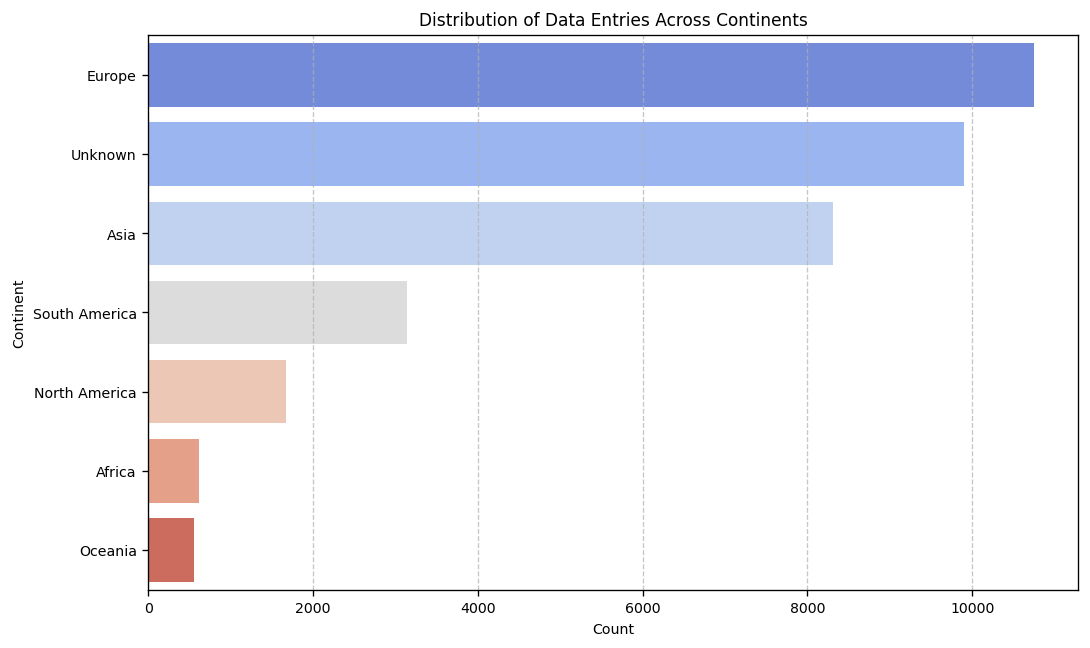

In [ ]:
# Distribution of countries across continents
plt.figure(figsize=(10, 6))
sns.countplot(y=DF['continent'], order=DF['continent'].value_counts().index, palette='coolwarm')
plt.title("Distribution of Data Entries Across Continents")
plt.xlabel("Count")
plt.ylabel("Continent")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

## Analysis

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors as mcolors
import matplotlib.ticker as ticker
import seaborn as sns

rcParams = plt.rcParams

rcParams['figure.figsize'] = 8,6
rcParams['figure.dpi'] = 120
# rcParams['font.family'] = 'lmodern'
rcParams['font.size'] = '8.5'
# rcParams['text.latex.preamble'] = r'\usepackage{lmodern}'


colors20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
# Scale the RGB values to the [0, 1] range.
for i in range(len(colors20)):
    red, green, blue = colors20[i]
    colors20[i] = (red / 255., green / 255., blue / 255.)

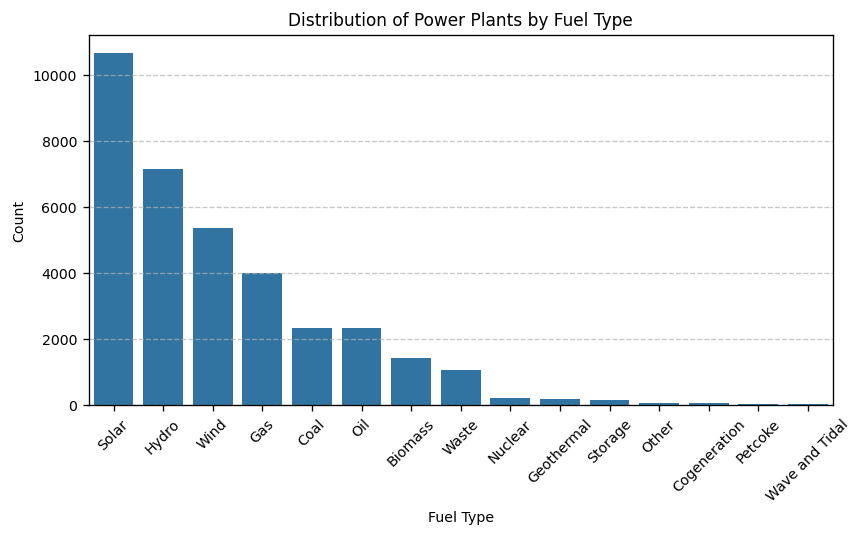

In [ ]:
# Geographic Distribution and Energy Mix Disparities
plt.figure(figsize=(8, 4))
sns.countplot(data=DF, x='primary_fuel', order=DF['primary_fuel'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribution of Power Plants by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

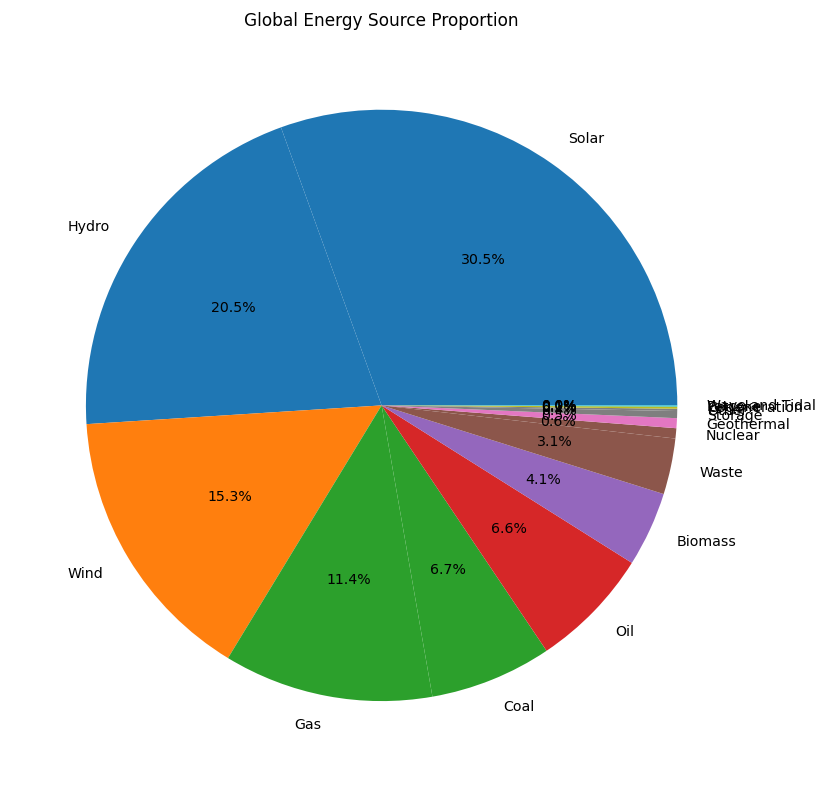

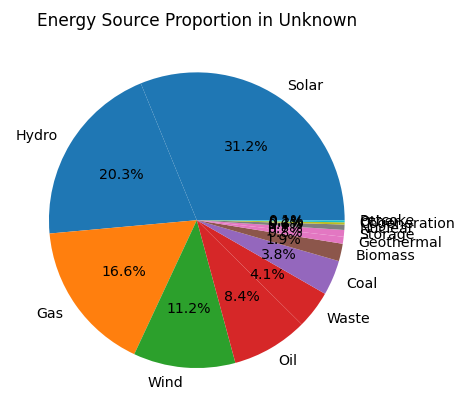

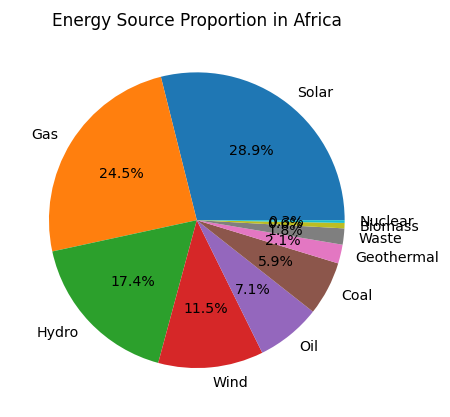

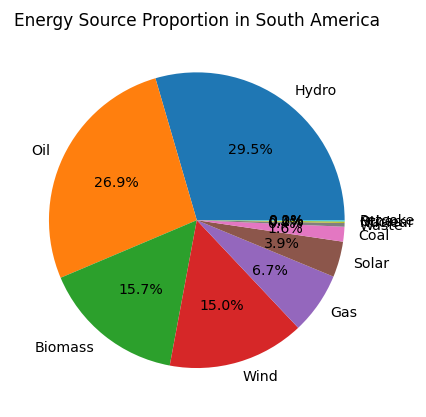

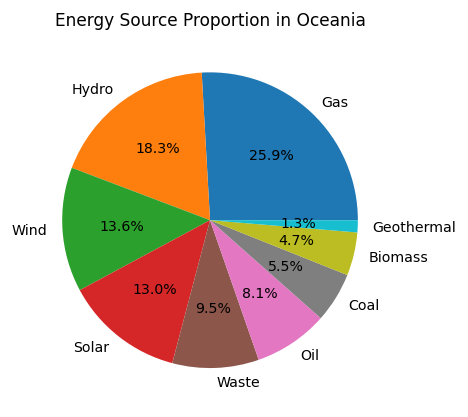

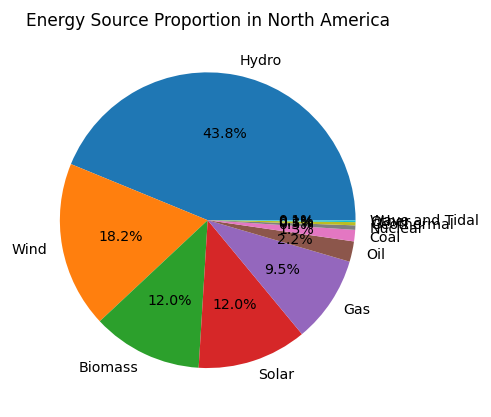

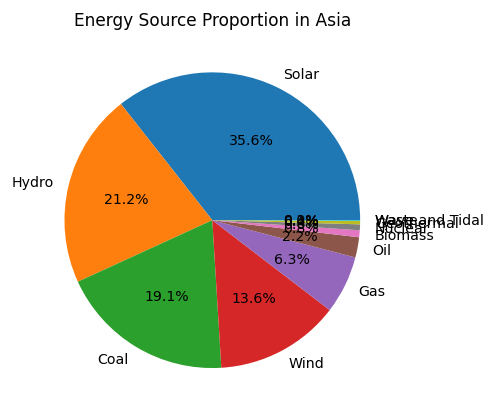

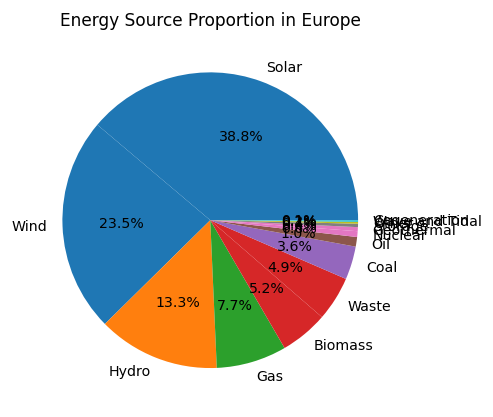

In [ ]:
# Pie chart for global energy source proportion
plt.figure(figsize=(8, 8))
DF['primary_fuel'].value_counts().plot.pie(autopct='%1.1f%%', colormap='tab10')
plt.title("Global Energy Source Proportion")
plt.ylabel("")
plt.show()

# Pie chart for continent-level energy source proportion
continents = DF['continent'].unique()
for continent in continents:
    plt.figure(figsize=(4, 4))
    DF[DF['continent'] == continent]['primary_fuel'].value_counts().plot.pie(autopct='%1.1f%%', colormap='tab10')
    plt.title(f"Energy Source Proportion in {continent}")
    plt.ylabel("")
    plt.show()

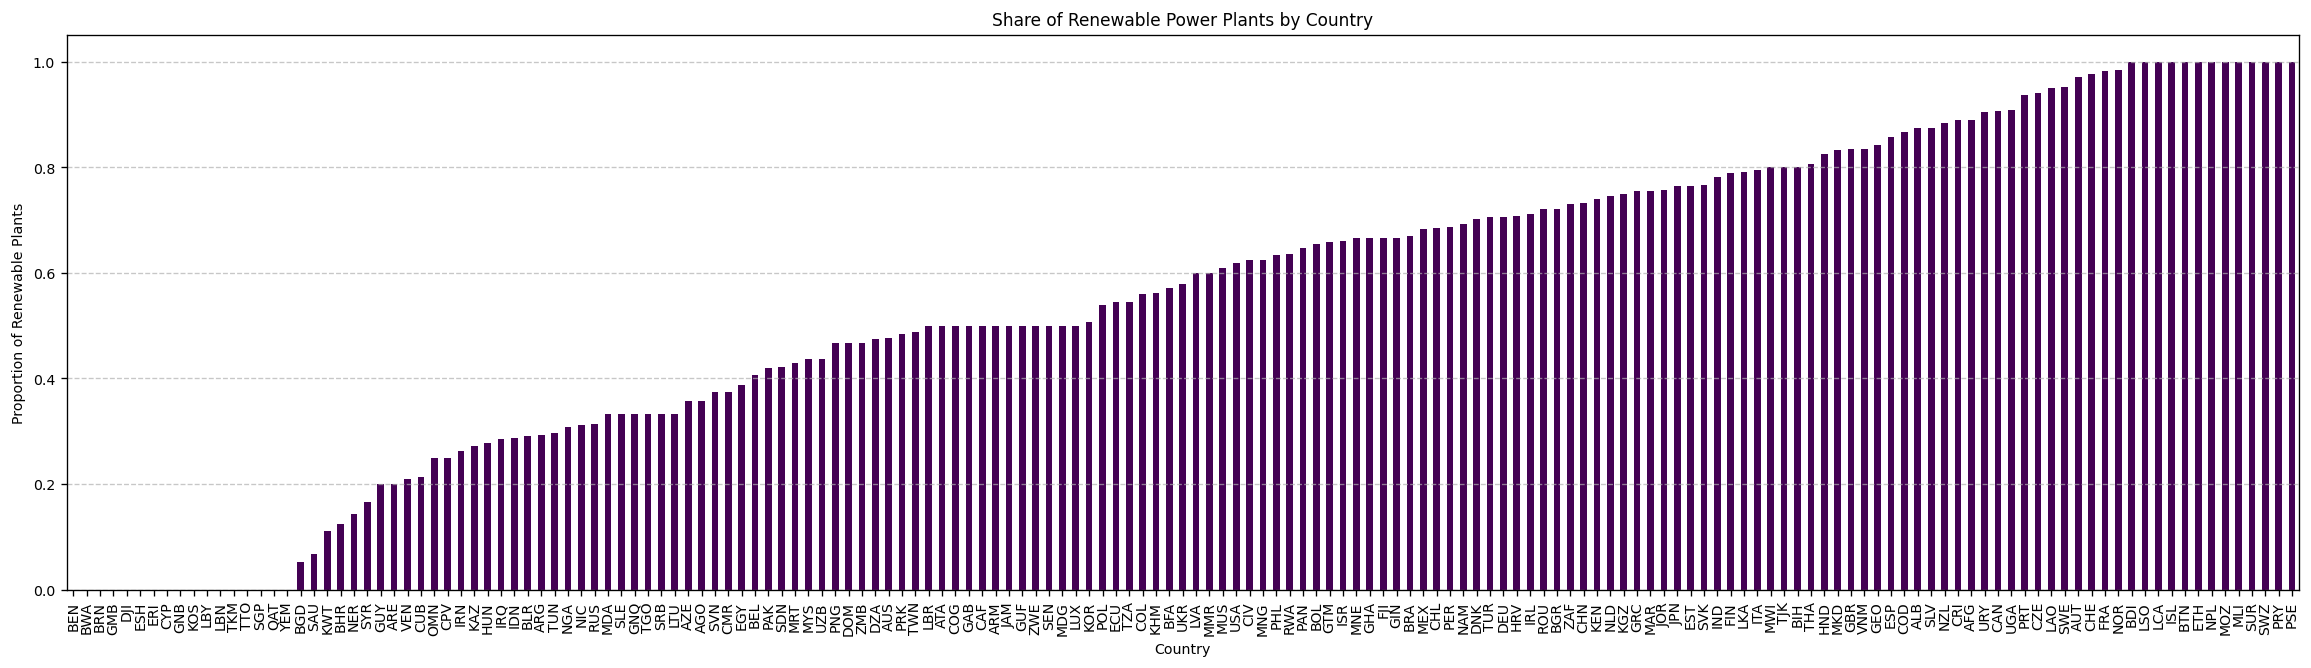

In [ ]:
# Renewable Energy Transition Assessment
renewable_sources = ["Solar", "Wind", "Hydro", "Geothermal", "Biomass"]
DF['is_renewable'] = DF['primary_fuel'].isin(renewable_sources)
renewable_trend = DF.groupby('country')['is_renewable'].mean().sort_values()

plt.figure(figsize=(24, 6))
renewable_trend.plot(kind='bar', colormap='viridis')
plt.title("Share of Renewable Power Plants by Country")
plt.ylabel("Proportion of Renewable Plants")
plt.xlabel("Country")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


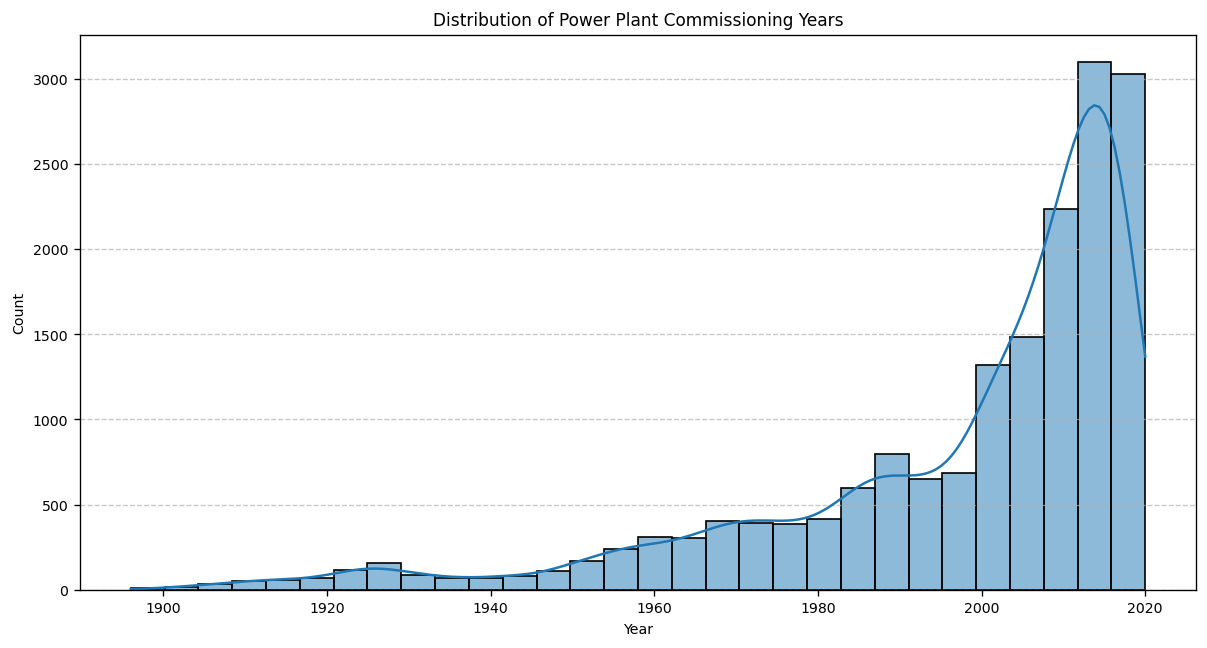

In [ ]:
# Age and Efficiency Analysis
if 'commissioning_year' in DF.columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(DF['commissioning_year'].dropna(), bins=30, kde=True)
    plt.title("Distribution of Power Plant Commissioning Years")
    plt.xlabel("Year")
    plt.ylabel("Count")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

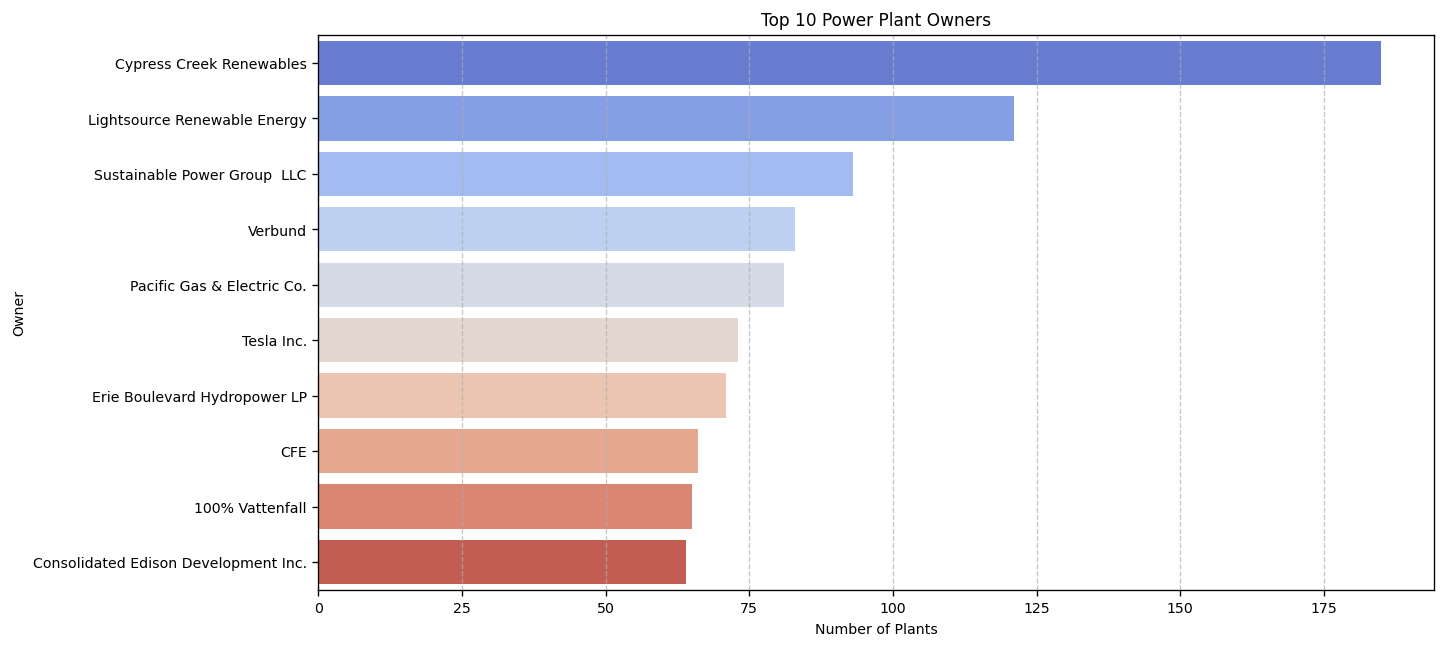

In [ ]:
# Ownership Structure and Market Concentration
if 'owner' in DF.columns:
    top_owners = DF['owner'].value_counts().nlargest(10)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_owners.values, y=top_owners.index, palette='coolwarm')
    plt.title("Top 10 Power Plant Owners")
    plt.xlabel("Number of Plants")
    plt.ylabel("Owner")
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()